<a href="https://colab.research.google.com/github/goglom/data_processing_methods_in_scientific_research/blob/main/problem_2/problem_2_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def convolution(x, h):
  [N, M] = map(len, [x, h])
  result = np.zeros(N + M - 1)

  for i in range(N):
    for j in range(M):
      result[i + j] += x[i] * h[j]

  return result

In [ ]:
assert np.all(convolution([1,2,3],[4,5,6,7]) == convolution([4,5,6,7],[1,2,3]))

In [ ]:
def convolution_fft(x, h):
  [N, M] = map(len, [x, h])
  x_wide = np.zeros(N + M - 1)
  h_wide = np.zeros(N + M - 1)
  x_wide[:N] = x
  h_wide[:M] = h

  return np.real(np.fft.ifft(np.fft.fft(x_wide) * np.fft.fft(h_wide)))

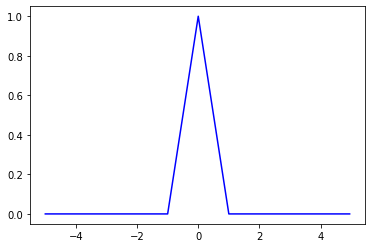

In [ ]:
def rectangle(x):
  A = 1
  bound = 0.5
  if -bound < x < bound:
    return A
  else:
    return 0

def convo(x):
  fog = 0
  xt = -5
  dx = 0.01
  while xt < 5:
    fog += rectangle(xt) * rectangle(x-xt) * dx
    xt += dx
  return fog


dt = 0.05
t = np.arange(-5, 5, dt)
conv = t.copy()
conv = [convo(conv[i]) for i in range(conv.shape[0])]

plt.plot(t, conv, 'b') 


# Прямоугольные сигналы


In [ ]:
class Rect:
  def __init__(self, l_bound, r_bound):
    self.lb = l_bound
    self.rb = r_bound

  
  def __call__(self, x: np.array) -> float:
    result = np.zeros_like(x)
    for i in range(x.shape[0]):
      if x[i] > self.lb and x[i] < self.rb:
        result[i] = 1.0

    return result

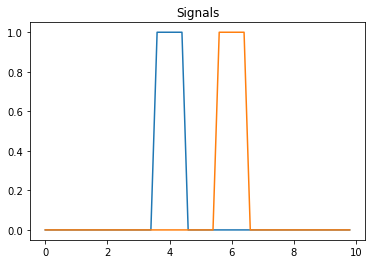

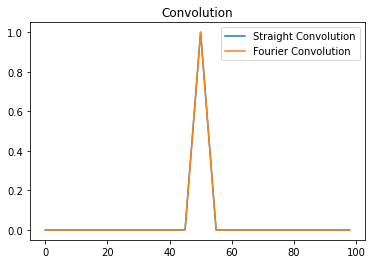

In [ ]:
timestep = 0.2

start, stop = 0, 10
t = np.arange(start, stop, timestep)

rect = Rect(3.5, 4.5)
x = rect(t)

rect = Rect(5.5, 6.5)
h = rect(t)


plt.figure(1)
plt.title("Signals")
plt.plot(t, x)
plt.plot(t, h)

plt.figure(2)
plt.title("Convolution")
plt.plot(convolution(x, h) * timestep, label="Straight Convolution")
plt.plot(convolution_fft(x, h) * timestep, label="Fourier Convolution")
plt.legend()
